In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, integrate, oo, cos
from scipy.integrate import quad
from scipy.special import sici, exp1
import scipy.special as sc

In [3]:
# 單位 wavelength & velocity_g & x-vt
Omega = 2*math.pi*5*(10**9) # GHz
Gamma = 2*math.pi*0.01*(10**9) # GHz
wavelength = 0.06 # 6cm
velocity_g = 3*10**8 # m/s
t = 10**(-9) #1ns 自訂
x = -0.001 #1mm
o_width = 100
omega_sa = 0.995*Omega
omega_sb = 1.005*Omega
omega_s = np.linspace(omega_sa, omega_sb, o_width)

In [41]:
# 初始化一个用于存储结果的一维数组
Reflection_o_x_t = np.array([0+0j]*o_width)
Reflection_omega_s = np.array([0+0j]*o_width)
CI = np.array([0+0j]*o_width)
SI = np.array([0+0j]*o_width)
z = np.array([0+0j]*o_width)
R1 = np.array([0+0j]*o_width)
R2 = np.array([0+0j]*o_width)
R3 = np.array([0+0j]*o_width)

$
ci(xy) = - \int_x^{\infty} \frac{cos(zy)}{z}dz
$

$
si(xy) = - \int_x^{\infty} \frac{sin(zy)}{z}dz
$

$ 
R(\omega_s,x,t)=R(\omega_s)e^{-i\frac{\omega_s}{v_g}(x+v_gt)}$   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$+\frac{R(\omega_s)}{2\pi}$ $e^{-i\frac {\omega_s}{v_g}(x+v_gt)}[ici(\omega_{s}\frac{|x|}{v_g})+si(\omega_s\frac{|x|}{v_g})]$  
$Eq(44)$  
&emsp; &emsp; &emsp; &emsp; $x<0$ &emsp; $x+v_gt>0$  
$
|R(\omega_s,x,t)|^2 = |R(\omega_s)|^2|(1+z)|^2
$  
$z=\frac {1}{2\pi}[ici(\omega_{s}\frac{|x|}{v_g})+si(\omega_s\frac{|x|}{v_g})]$

In [43]:
# directly compute with ci,si 
# 公式44 #
for i in range(len(omega_s)):
    Transmission_omega_s = (omega_s[i]-Omega)/(omega_s[i]-Omega+1j*Gamma/2)
    Reflection_omega_s[i] = -1j*Gamma/2/(omega_s[i]-Omega+1j*Gamma/2)
    EX = x+velocity_g*t
    CI[i] = ci = sc.sici(omega_s[i]*abs(x)/velocity_g)[1] 
    SI[i] = si = sc.sici(omega_s[i]*abs(x)/velocity_g)[0] - math.pi/2
    # Reflection_o_x_t
    R1[i] = Reflection_omega_s[i]*math.e**(-1j*(omega_s[i]/velocity_g)*EX)
    R2[i] = Reflection_omega_s[i]/2/math.pi*math.e**(-1j*omega_s[i]/velocity_g*EX)
    R3[i] = 1j*ci+si
    Reflection_o_x_t[i] = R1[i] + R2[i] * R3[i] 
    z[i] = R3[i]/(2*math.pi)
    if x >= 0 :
        print('x>=0')
        break
    if EX <= 0 :
        print('x+velocity_g*t <= 0')
        break

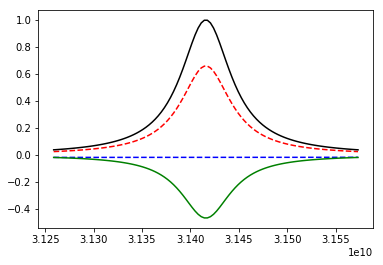

In [44]:
plt.plot(omega_s,abs(Reflection_o_x_t)**2,'r--')
plt.plot(omega_s,abs(Reflection_omega_s)**2,'k-')
plt.plot(omega_s,z**2,'b--')
plt.plot(omega_s,2*abs(Reflection_omega_s)**2*np.real(z),'g-')
plt.show()

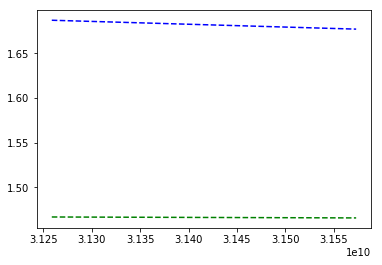

In [50]:
plt.plot(omega_s,abs(CI),'b--')
plt.plot(omega_s,abs(SI),'g--')
plt.show()

In [51]:
print(sc.sici(0)[1])

-inf


In [ ]:
# 定义公式
def integrand(x,t):
    return -np.cos(z * y) / z

def ci(x, y):
    result, _ = quad(integrand, x, np.inf, args=(y,))
    return result

In [61]:
c = np.array([0+0j]*o_width)
ci = np.array([0+0j]*o_width)

for i in range(len(omega_s)):
    c[i] =omega_s[i]*abs(x)/velocity_g
    fun = lambda t: (np.cos(t)-1)/t
    ci[i] = quad(fun,0,c[i])[0] + math.log(c[i])
print(ci)

[-2.26419302+0.j -2.26409206+0.j -2.26399111+0.j -2.26389017+0.j
 -2.26378923+0.j -2.26368831+0.j -2.2635874 +0.j -2.2634865 +0.j
 -2.26338561+0.j -2.26328474+0.j -2.26318387+0.j -2.26308301+0.j
 -2.26298216+0.j -2.26288132+0.j -2.26278049+0.j -2.26267968+0.j
 -2.26257887+0.j -2.26247807+0.j -2.26237729+0.j -2.26227651+0.j
 -2.26217575+0.j -2.26207499+0.j -2.26197425+0.j -2.26187351+0.j
 -2.26177279+0.j -2.26167207+0.j -2.26157137+0.j -2.26147068+0.j
 -2.26136999+0.j -2.26126932+0.j -2.26116866+0.j -2.26106801+0.j
 -2.26096737+0.j -2.26086673+0.j -2.26076611+0.j -2.2606655 +0.j
 -2.2605649 +0.j -2.26046431+0.j -2.26036373+0.j -2.26026316+0.j
 -2.2601626 +0.j -2.26006205+0.j -2.25996151+0.j -2.25986099+0.j
 -2.25976047+0.j -2.25965996+0.j -2.25955946+0.j -2.25945897+0.j
 -2.2593585 +0.j -2.25925803+0.j -2.25915757+0.j -2.25905713+0.j
 -2.25895669+0.j -2.25885626+0.j -2.25875585+0.j -2.25865544+0.j
 -2.25855505+0.j -2.25845466+0.j -2.25835429+0.j -2.25825392+0.j
 -2.25815357+0.j -2.25805

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [56]:
x2 = lambda x: x**2
quad(x2, 0, 4)

(21.333333333333336, 2.368475785867001e-13)